In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

df = pd.read_excel('SalesOfMedicalDevices.xlsx')
df

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,1,2,3,-1
1,1,2010,1,1,3,-1
2,1,2011,1,2,0,1
3,1,2012,3,2,0,1
4,1,2013,3,3,3,1
...,...,...,...,...,...,...
606,47,2017,1,2,1,1
607,47,2018,0,1,1,1
608,47,2019,3,2,2,1
609,47,2020,5,2,1,1


In [51]:
df.groupby(['Customer', 'year']).apply(lambda df: df.loc[df.CustomerSatisfaction.idxmax()])

Customer  year  NoOfSalesCalls  NoOfTargetedEmails  NoOfSales  \
Customer year                                                                  
1        2009         1  2009               1                   2          3   
         2010         1  2010               1                   1          3   
         2011         1  2011               1                   2          0   
         2012         1  2012               3                   2          0   
         2013         1  2013               3                   3          3   
...                 ...   ...             ...                 ...        ...   
47       2017        47  2017               1                   2          1   
         2018        47  2018               0                   1          1   
         2019        47  2019               3                   2          2   
         2020        47  2020               5                   2          1   
         2021        47  2021               3                   3          0   

               CustomerSatisfaction  
Customer year                        
1        2009                    -1  
         2010                    -1  
         2011                     1  
         2012                     1  
         2013                     1  
...                             ...  
47       2017                     1  
         2018                     1  
         2019                     1  
         2020                     1  
         2021                     1  

[611 rows x 6 columns]

<Axes: >

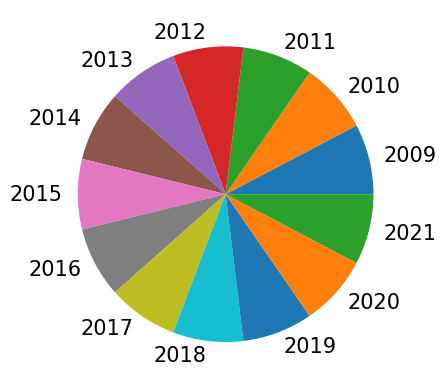

In [52]:
grp = df.groupby(['year'])
grp.size()
grp=df.groupby("year")
grp.size().plot(kind='pie')

NoOfSalesCalls
0    169
1    245
2     13
3    161
4      4
5     19
dtype: int64


<Axes: >

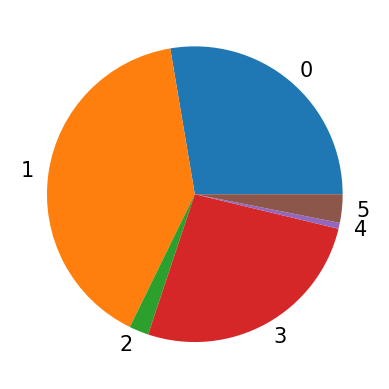

In [53]:
grp = df.groupby(['NoOfSalesCalls'])
print(grp.size())
grp=df.groupby("NoOfSalesCalls")
grp.size().plot(kind='pie')

NoOfTargetedEmails
0    150
1    147
2    146
3    168
dtype: int64


<Axes: >

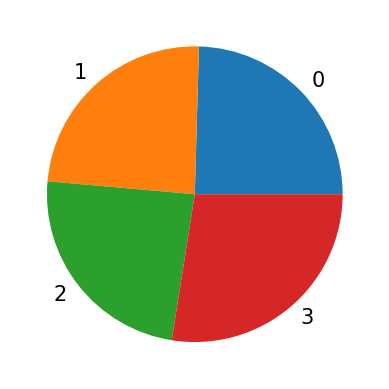

In [54]:
grp = df.groupby(['NoOfTargetedEmails'])
print(grp.size())
grp=df.groupby("NoOfTargetedEmails")
grp.size().plot(kind='pie')

NoOfSales
0    229
1    129
2     60
3    170
4     23
dtype: int64


<Axes: >

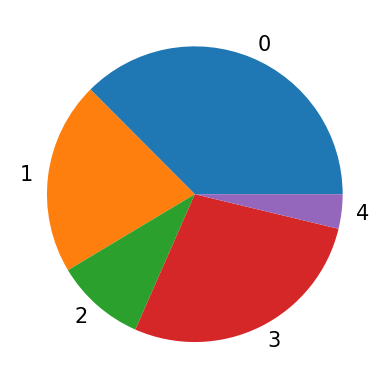

In [60]:
grp = df.groupby(['NoOfSales'])
print(grp.size())
grp=df.groupby("NoOfSales")
grp.size().plot(kind='pie')

In [61]:
grp = df.groupby(['CustomerSatisfaction','NoOfTargetedEmails']).size()
grp

CustomerSatisfaction  NoOfTargetedEmails
-1                    0                     42
                      1                     56
                      2                     51
                      3                     59
 0                    0                     91
                      1                     47
                      2                     57
                      3                     74
 1                    0                     17
                      1                     44
                      2                     38
                      3                     35
dtype: int64

In [62]:
grp = df.groupby(['CustomerSatisfaction','NoOfSalesCalls']).size()
grp

CustomerSatisfaction  NoOfSalesCalls
-1                    0                  46
                      1                 103
                      2                   6
                      3                  45
                      4                   1
                      5                   7
 0                    0                 101
                      1                  70
                      2                   4
                      3                  83
                      4                   2
                      5                   9
 1                    0                  22
                      1                  72
                      2                   3
                      3                  33
                      4                   1
                      5                   3
dtype: int64

In [63]:
X = df.copy().drop(["CustomerSatisfaction"], axis = 1)
y = df.copy()["CustomerSatisfaction"]

print(X.shape)
print(y.shape)

(611, 5)
(611,)


<Axes: >

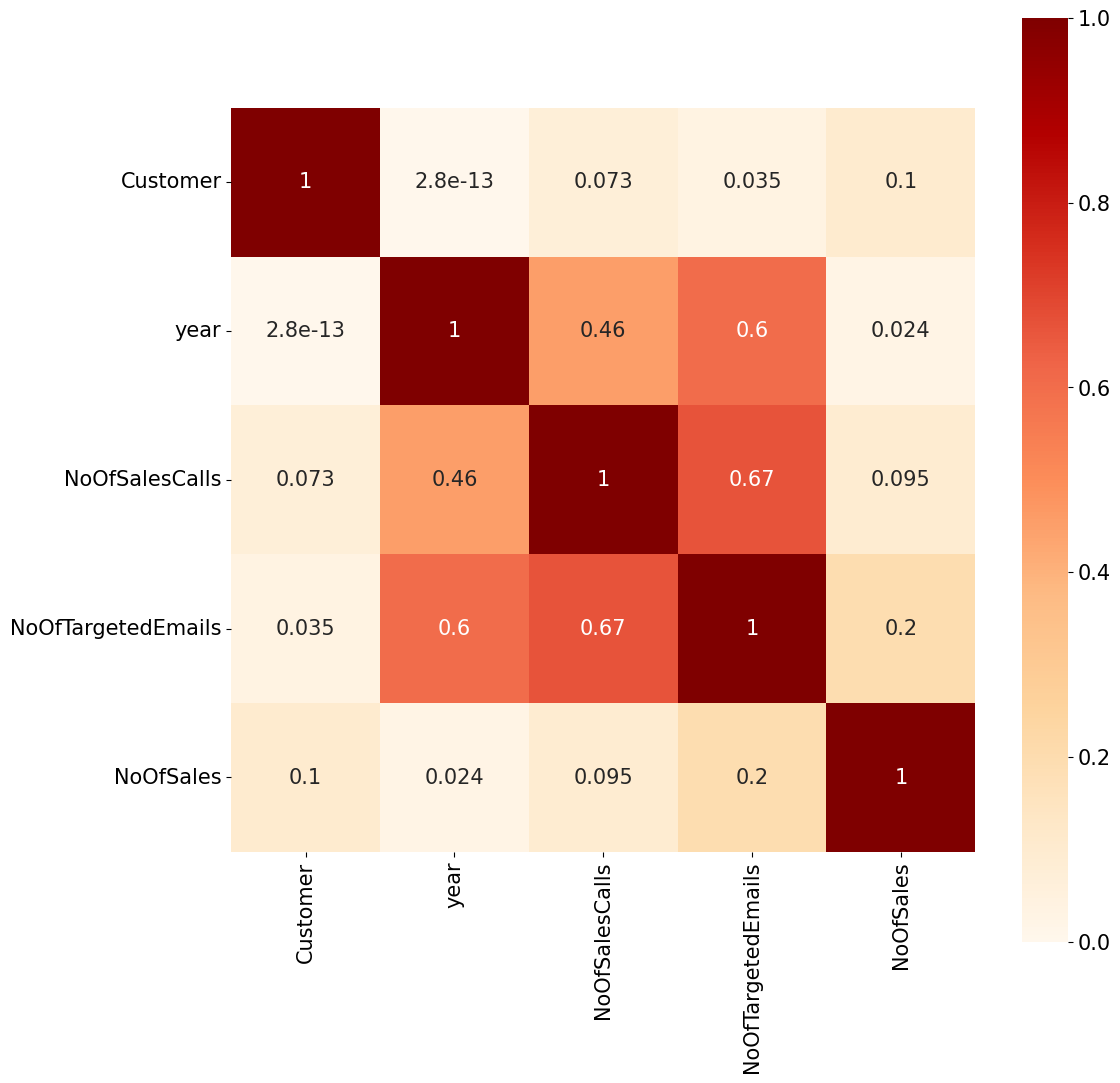

In [64]:
corr = X.corr()
cmap = sns.color_palette("OrRd", as_cmap=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, mask=None, cmap=cmap, square=True, annot=True)

Text(0.5, 1.0, 'Satisfaction Distribution')

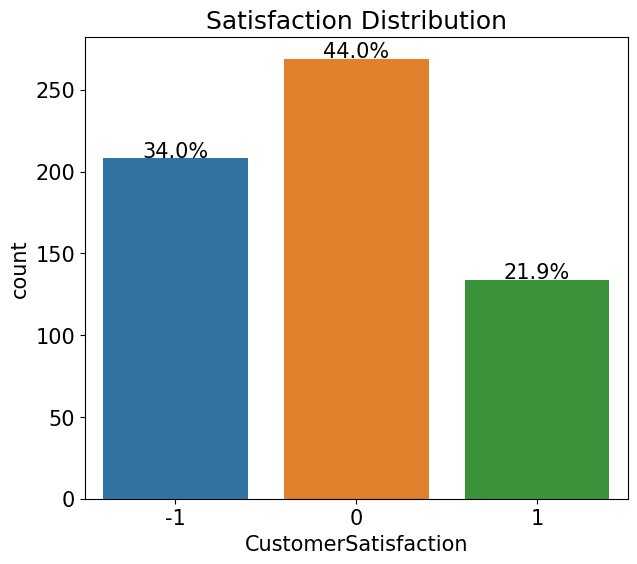

In [65]:
def write_percent(ax,total_size):
    
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(left_coord+ width/2.0,
               height + total_size*0.001,
               '{:1.1f}%'.format(percent),
               ha='center')
        
mpl.rc('font',size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='CustomerSatisfaction',data=df)
write_percent(ax,len(df))
ax.set_title('Satisfaction Distribution')

In [66]:
#df['CustomerSatisfaction'].replace({'satisfied':1,'dissatisfied':0},inplace=True)
df['year'] = df.year.apply(lambda x: x%100)
df

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,9,1,2,3,-1
1,1,10,1,1,3,-1
2,1,11,1,2,0,1
3,1,12,3,2,0,1
4,1,13,3,3,3,1
...,...,...,...,...,...,...
606,47,17,1,2,1,1
607,47,18,0,1,1,1
608,47,19,3,2,2,1
609,47,20,5,2,1,1


In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('CustomerSatisfaction', axis=1)
y = df['CustomerSatisfaction']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
X_train.shape ,y_train.shape

((488, 5), (488,))

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []
#
#
#
for k, (train, test) in enumerate(kfold):
    
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Accuracy: %.3f' % (k+1, score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))


Fold:  1, Accuracy: 0.653
Fold:  2, Accuracy: 0.673
Fold:  3, Accuracy: 0.612
Fold:  4, Accuracy: 0.735
Fold:  5, Accuracy: 0.673
Fold:  6, Accuracy: 0.714
Fold:  7, Accuracy: 0.714
Fold:  8, Accuracy: 0.694
Fold:  9, Accuracy: 0.646
Fold: 10, Accuracy: 0.688


Cross-Validation accuracy: 0.680 +/- 0.035


In [77]:
#construct baseline pipeline

#AUC



pipe_rf = RandomForestClassifier(random_state=123)

In [78]:
model = pipe_rf.fit(X_train, y_train)

In [79]:
y_score = model.predict_proba(X_test)

In [81]:
#Binarize the output
y_test_bin = label_binarize(y_test, classes=[-1,0,1])
n_classes = y_test_bin.shape[1]

AUC for Class 1: 0.8253012048192772
AUC for Class 2: 0.8125335480407944
AUC for Class 3: 0.886463683052091


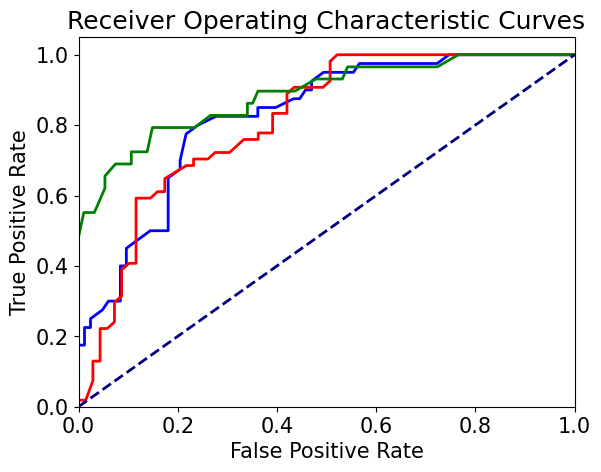

In [84]:
fpr = dict()
tpr = dict()
roc_auc = dict()
colors = ['blue', 'red', 'green']
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color=colors[i], lw=2)
  print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curves')
plt.show()